# 0.0 IMPORTS

## 0.1. Helper Functions

In [56]:
import pandas            as pd 
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

import math
import inflection
import datetime

from IPython.core.display import HTML
from IPython.display      import Image


## 0.1.1 Helper Fuctions

In [57]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 6]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [58]:
 jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data 

In [59]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# MERGE
df_raw = pd.merge ( df_sales_raw, df_store_raw, how='left', on='Store')

In [60]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
614086,507,6,2013-12-28,8905,737,1,0,0,0,a,c,9070.0,4.0,2011.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"


# 1.0. Passo 01 - DESCRIACAO DOS DADOS 

In [61]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [62]:
df_raw.columns
# AQUI CONSULTAMOS AS COLUNAS PARA SABER COMO ESTA OS NOMES DAS COLUNAS, PODEMOS NOTAR QUE ESTAO EM LETRAR,MAIUSCULA E MINUSCULA, PARA FACILITAR, TROCAMOS OS NOMES FAZENDO A FUNCAO APRSENTADA A BAIXO 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [63]:
cols_old =['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map ( snakecase, cols_old ) )

# RENAME
df1.columns = cols_new

# USAMOS ESSA FUNCAO PARA FAZEAR A ALTERACAO DOS NOMES NAS COLUNAS.

In [64]:
df1.columns
# CONSULTANDO O DATAFRAME PODEMOS VERIFICAR QUE OS NOMES FORAM ALTERADO PARA LETRAS MINUSCULA FACILITANDO O TRABALHO.

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [65]:
print( 'Number of Rows:{}'.format( df1.shape[0] ) )
print( 'Number of Cols:{}'.format( df1.shape[1] ) )

# USAMOS ESSE COMANDO PARA SABER O TAMANHO DO NOSSO DATAFRAME 

Number of Rows:1017209
Number of Cols:18


## 1.3. Data Types

In [66]:
df1['date'] = pd.to_datetime( df1 ['date'] ) # USADO ESSA FUNCAO PARA TROCAR PARA DATA , POR QUE QUANDO SE LE O ARQUIVO A COLUNA DATA VEM COMO OBJECT, ENTAO ELE ASSUMIU COMO SE FOSSE UMA STRINGER  
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check N/A

In [67]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout N/A

In [68]:
df1['competition_distance'].max()
# o valor quando voce aplica max era de 75860.0 de distancia para a outra loja, voce aplica a forma a baixo para tratar os N/A, quando voce aplica a funcao a baixo , trata os N/A faltantes e assim nao se perde os dados.

75860.0

In [69]:
# competition_distance => essa informacao voce pega no site do kaggle => CompetitionDistance - distance in meters to the nearest competitor store

df1['competition_distance'] = df1['competition_distance'].apply( lambda x:200000.0 if math.isnan( x ) else x )

# competition_open_since_month => Fonte Kaggle => gives the approximate year and month of the time the nearest competitor was opened

df1['competition_open_since_month'] = df1.apply( lambda x: x['date' ].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

# competition_open_since_year

df1['competition_open_since_year'] = df1.apply( lambda x: x[ 'date' ].year if math.isnan(x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )
                            
# promo2_since_week  - describes the year and calendar week when the store started participating in Promo2 
df1['promo2_since_week'] = df1.apply( lambda x: x[ 'date' ].week if math.isnan(x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )    

# promo2_since_year 

df1['promo2_since_year'] = df1.apply( lambda x: x[ 'date' ].year if math.isnan(x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 ) 

# promo_interval -PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

month_map = {1:'Jan',2:'Fev', 3: 'Mar',4: 'Apr', 5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)



In [70]:
df1.isna().sum() 

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [71]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [72]:
df1['competition_open_since_month'] = df1 ['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1 ['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1 ['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1 ['promo2_since_year'].astype( int )

In [73]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical 

In [74]:
num_attributes = df1.select_dtypes( include=['int64', 'float64' ] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Atributes

In [75]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T

# Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() -x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis'] 

In [76]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/Users/jhmartire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

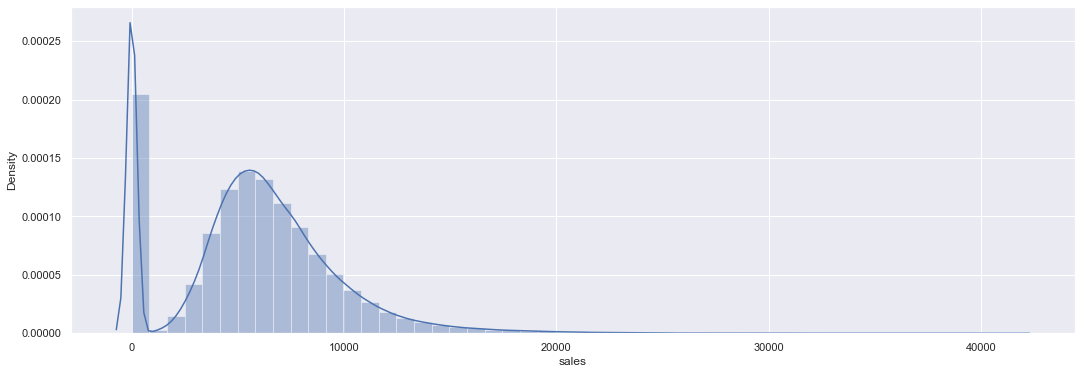

In [77]:
sns.distplot( df1['sales'] )

## 1.7.2 Categorical Attributes

In [78]:
cat_attributes.apply( lambda x: x.unique(). shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

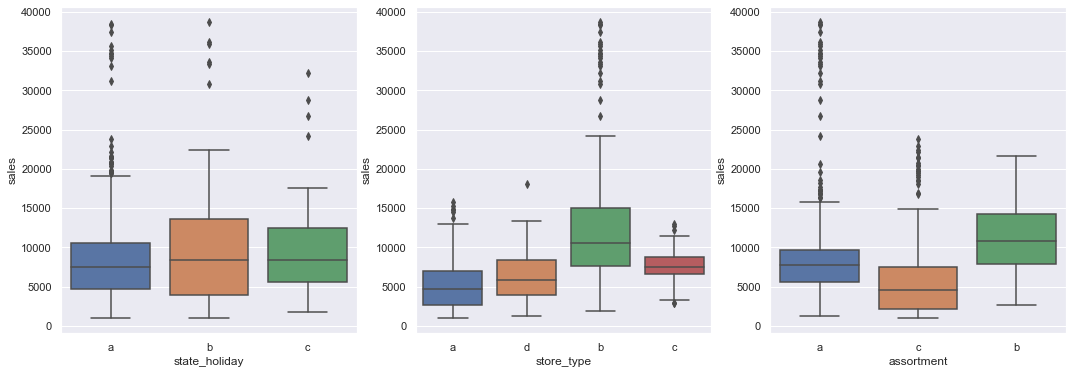

In [79]:
aux1 = df1[ ( df1['state_holiday'] != '0' ) & (df1['sales']> 0 ) ]

plt.subplot(1,3,1)
sns.boxplot ( x='state_holiday', y='sales', data=aux1 )

plt.subplot(1,3,2)
sns.boxplot ( x='store_type', y='sales', data=aux1 )

plt.subplot(1,3,3)
sns.boxplot ( x='assortment', y='sales', data=aux1 )


# 2.0. Passo 02 - FEATURE ENGINEERING 

In [80]:
df2 = df1.copy()

## 2.1. Mind map Height Hypothesis

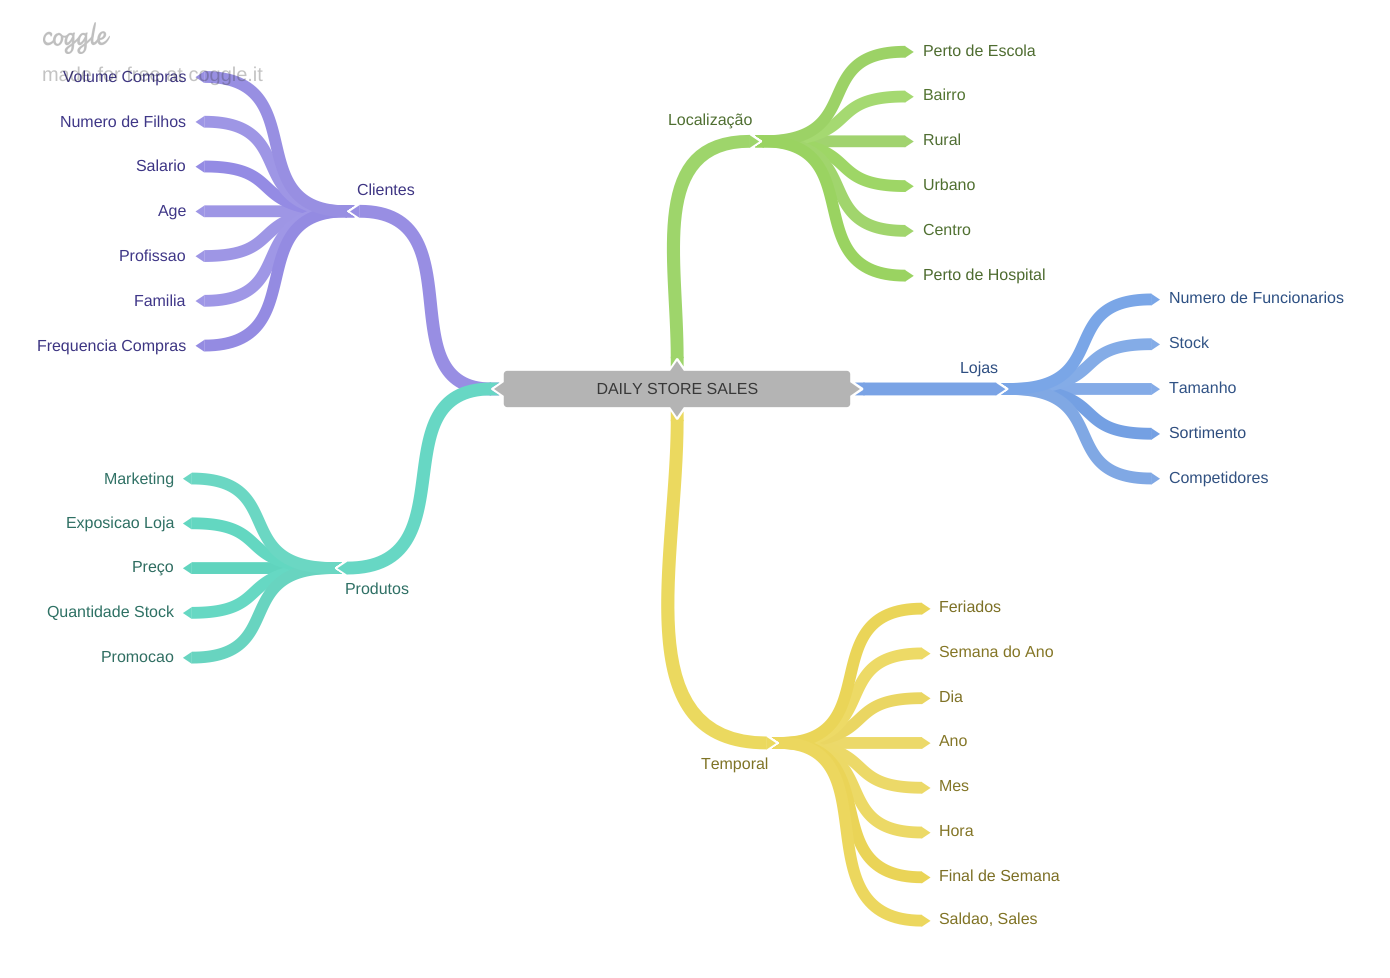

In [81]:
Image( 'img/MindMapHypothesis.png', width=800, height=800)

## 2.1. Criacao das Hipoteses

### 2.1.1. Hipoteses Loja

**1.**  Lojas com numero maior de funcionario deveriam vender mais.

**2.**  Lojas com mair capacidade de estoque deveriam vender mais.

**3.**  Lojas com maior porte deveriam vender mais.

**4.**  Lojas com maior sortimento deveriam vender mais.

**5.**  Lojas com competidores mais proximos deveriam vender menos.

**6.** Lojas com competidores a mais tempo deveriam vender mais.

### 2.1.2. Hipoteses do Produto

**1.**  Lojas que investem mais em Marketin deveriam vender mais.

**2.**  Lojas com maior exposicao de produto deveriam denver mais.

**3.**  Lojas com produtos com preco menor deveriam vender mais.

**4.**  Lojas com promocoes mais agressivas ( descontos maiores), deveriam vender mais.

**5.**  Lojas com promocoes ativas por mais tempo deveriam vender mais.

**6.**  Lojas com mais dias de promocao deveriam vender mais.

**7.**  Lojas com mais promocoes consecutivas deveriam vender mais.


### 2.1.3. Hipoteses Tempo

**1.**  Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.**  Lojas deveriam vender mais ao longo dos anos.

**3.**  Lojas deveriam vender mais no segundo semestre do ano.

**4.**  Lojas deveriam vender mais depois do dia 10 de cada mes.

**5.**  Lojas deveriam vender menos aos finais de semana.

**6.**  Lojas deveriam vender menos durante os feriados escolares.



## 2.2. Lista final de Hipoteses

**1.**  Lojas com maior sortimento deveriam vender mais.

**2.**  Lojas com competidores mais proximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.**  Lojas com promocoes ativas por mais tempo deveriam vender mais.

**5.**  Lojas com mais dias de promocao deveriam vender mais.

**6.**  Lojas com mais promocoes consecutivas deveriam vender mais.

**7.**  Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.**  Lojas deveriam vender mais ao longo dos anos.

**9.**  Lojas deveriam vender mais no segundo semestre do ano.

**10.**  Lojas deveriam vender mais depois do dia 10 de cada mes.

**11.**  Lojas deveriam vender menos aos finais de semana.

**12.**  Lojas deveriam vender menos durante os feriados escolares.




## 2.3. Feature Engineering

In [86]:
# Year
df2[ 'year' ] = df2[ 'date' ].dt.year

# Month
df2[ 'month' ] = df2[ 'date' ].dt.month

# Day
df2[ 'day' ] = df2[ 'date' ].dt.day

# Week of Year
df2[ 'week_of_year' ] = df2[ 'date' ].dt.weekofyear

# Yaar week
df2[ 'year_week' ] = df2[ 'date' ].dt.strftime( '%Y-%w' )

# Competition since 
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
df2[ 'competition_time_month'] = ( ( df2['date'] - df2['competition_since'] ) /30 ).apply(lambda x: x.days ).astype( int )

# promo since
df2['promo_since'] = df2[ 'promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

#assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

#state holiday

df2['state_holiday'] = df2[ 'state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

/var/folders/vp/z0zsw7sd3z1g0l663x5px37r0000gn/T/ipykernel_86713/1172704291.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2[ 'week_of_year' ] = df2[ 'date' ].dt.weekofyear


In [87]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
